Copyright © 2025 Technical University of Denmark

In [1]:
from os import chdir
chdir('../')

In [2]:
import numpy as np
from matplotlib import pyplot as plt

from lcg_plus.conversions import Delta_to_dB
from catprep import get_input_sq_cat
from lcg_plus.effective_sqz import effective_sqz
from breeding import sim_breeding_circuit
import seaborn as sns
import matplotlib as mpl
from time import time
hbar = 2
colwidth = 3.41667


In [3]:
r_dB = -20
parity = 0
grid = 'rect'
eta = 1


In [7]:
nums = np.arange(2,36)
runs = 20
Delta_ps = np.zeros((runs, len(nums)))
Delta_xs = np.zeros((runs,len(nums)))
probs = np.zeros((runs,len(nums)))
times = np.zeros((runs,len(nums)))


r = 0
while r < runs:
    for i, num in enumerate(nums): 
        t0 = time()
        
        cat = get_input_sq_cat(num, r_dB, parity, grid, eta)
        out, prob = sim_breeding_circuit(cat, num, np.ones(num-1)*np.pi/2, np.zeros(num-1))
        print(out.num_weights, (num+1)**2)
        
        Delta_ps[r,i] = effective_sqz(out, grid[0]+'p')
        Delta_xs[r,i] = effective_sqz(out, grid[0]+'x')
        probs[r,i] = prob
        t1 = time()
    
        times[r,i] = t1-t0
        print(num, t1-t0)
    r += 1


9 9
2 0.0063359737396240234
16 16
3 0.0035550594329833984
25 25
4 0.006260871887207031
36 36
5 0.006941795349121094
49 49
6 0.0057489871978759766
64 64
7 0.006870746612548828
81 81
8 0.008022069931030273
100 100
9 0.011366844177246094
121 121
10 0.012497901916503906
144 144
11 0.013638019561767578
169 169
12 0.014294862747192383
196 196
13 0.01581883430480957
225 225
14 0.019321203231811523
256 256
15 0.022750139236450195
289 289
16 0.026864051818847656
324 324
17 0.03195333480834961
361 361
18 0.03924417495727539
400 400
19 0.04284405708312988
441 441
20 0.048696041107177734
484 484
21 0.055721282958984375
529 529
22 0.06497001647949219
576 576
23 0.07218194007873535
625 625
24 0.08067893981933594
676 676
25 0.09232687950134277
729 729
26 0.10407519340515137
784 784
27 0.1160430908203125
841 841
28 0.13192105293273926
900 900
29 0.14417624473571777
961 961
30 0.15543103218078613
1024 1024
31 0.17923712730407715
1089 1089
32 0.18668699264526367
1156 1156
33 0.20573997497558594
1225 122

In [9]:
#np.save('timing/times.npy', times)
times = np.load('timing/times.npy')

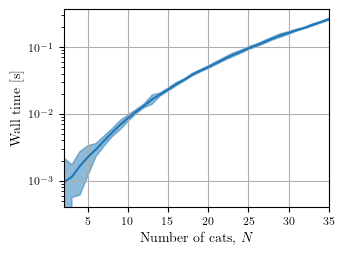

In [11]:
avg_t = np.mean(times,axis=0)
std = np.std(times, axis = 0)


mpl.rcParams.update({'font.size': 10, 
                     "text.usetex": True, 
                     'font.family':'serif', 
                     'xtick.labelsize': 8, 
                     'ytick.labelsize':8})

cmap = sns.color_palette('tab10',as_cmap =True)
c = cmap(np.linspace(0, 1, 4))

fig, ax = plt.subplots(1,1, figsize = (colwidth,0.75*colwidth))

ax.plot(nums, avg_t, color =c[0])
ax.fill_between(nums, avg_t+std, avg_t-std, alpha = 0.5, color = c[0])
    
ax.set_yscale('log')
ax.set_xlabel(r'Number of cats, $N$')
ax.set_ylabel('Wall time [s]')
ax.grid('on')
ax.set_xlim([2,35])
plt.savefig('figures/timing.pdf', bbox_inches ='tight')
plt.show()